In [1]:
from emnist import extract_training_samples, extract_test_samples
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D

from tensorflow.keras.utils import to_categorical

import os
import time

2024-03-01 13:42:02.749288: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 13:42:02.793457: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
img_train, labels_train = extract_training_samples('letters')
img_test, labels_test= extract_test_samples('letters')

In [4]:
labels_train[0]

23

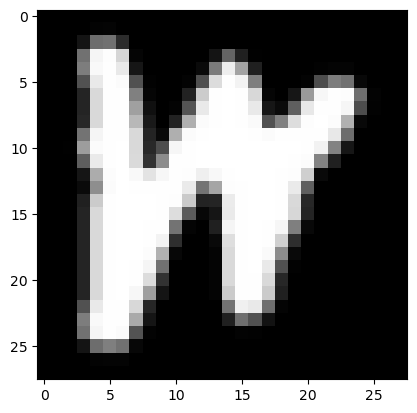

In [5]:
plt.plot()
plt.imshow((img_train[0]), cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
img_train.shape, img_test.shape
# img_train = img_train|:500]

((124800, 28, 28), (20800, 28, 28))

In [7]:
img_train_norm, img_test_norm = img_train/255, img_test/255

In [8]:
img_train_final = np.reshape(img_train_norm, (img_train.shape[0], 28, 28, 1))
img_test_final = np.reshape(img_test_norm,(img_test.shape[0], 28, 28, 1))

In [9]:
img_train_final.shape, img_test_final.shape

((124800, 28, 28, 1), (20800, 28, 28, 1))

In [10]:
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [11]:
labels_train.shape, labels_test.shape

((124800, 27), (20800, 27))

In [12]:
batch_size=32
epochs=2

params = {
    "epochs": epochs,
    "batch_size": batch_size,
}
TAG = 'démarrage'

In [13]:
# Model / data parameters
num_classes = 27
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilation du modèle
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

2024-03-01 13:42:05.679107: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: UNKNOWN ERROR (100)


In [14]:
start_time = time.time()
history = model.fit(img_train_final, labels_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Fin du chronomètre
end_time = time.time()

# Calcul du temps écoulé en secondes
training_time = end_time - start_time

Epoch 1/2
3510/3510 [==============================] - 29s 8ms/step - loss: 0.4060 - accuracy: 0.8705 - val_loss: 0.2283 - val_accuracy: 0.9264
Epoch 2/2
3510/3510 [==============================] - 37s 11ms/step - loss: 0.2079 - accuracy: 0.9290 - val_loss: 0.2018 - val_accuracy: 0.9352


In [15]:
# Afficher la structure du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [16]:
loss_test, accuracy_test = model.evaluate(img_test_final, labels_test)

650/650 [==============================] - 3s 5ms/step - loss: 0.2136 - accuracy: 0.9282


In [17]:
training_time

66.82921361923218

In [18]:
model.save('prediction_letter.keras')